In [88]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set_palette('hot', n_colors=7)
plt.rc('text', usetex=True)      

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

In [89]:
r0 = pd.read_csv('results.csv')
r1 = pd.read_csv('results_2.csv')
r1.columns = [i + " With c" for i in r1.columns]
r2 = pd.read_csv('scores_cnn1d.csv')
r3 = pd.read_csv('scores_cnn2d.csv')
r4 = pd.read_csv('scores_no.csv')
r = pd.concat((r0, r2, r3, r4), axis=1)
r = r.reindex(r.mean().sort_values(ascending=False).index, axis=1)
r

,Vanilla KNN,Vanilla CNN,Vanilla MLP,Residual PCR,Vanilla LM,Residual MLP,Residual KNN,Residual CNN2d,Residual CNN1d,Residual NO
0,0.235845,0.200709,0.131055,0.091035,0.091011,0.091185,0.087611,0.086500,0.085340,0.082140
1,0.229154,0.198205,0.130278,0.090773,0.090804,0.090542,0.087263,0.086063,0.084776,0.079732
2,0.235328,0.206192,0.131330,0.091223,0.091222,0.090467,0.087663,0.086369,0.084680,0.082396
3,0.235750,0.203666,0.133190,0.092500,0.092498,0.092726,0.089007,0.085679,0.083972,0.078158
4,0.226921,0.206842,0.127018,0.088002,0.087995,0.087422,0.084397,0.089222,0.087295,0.080168


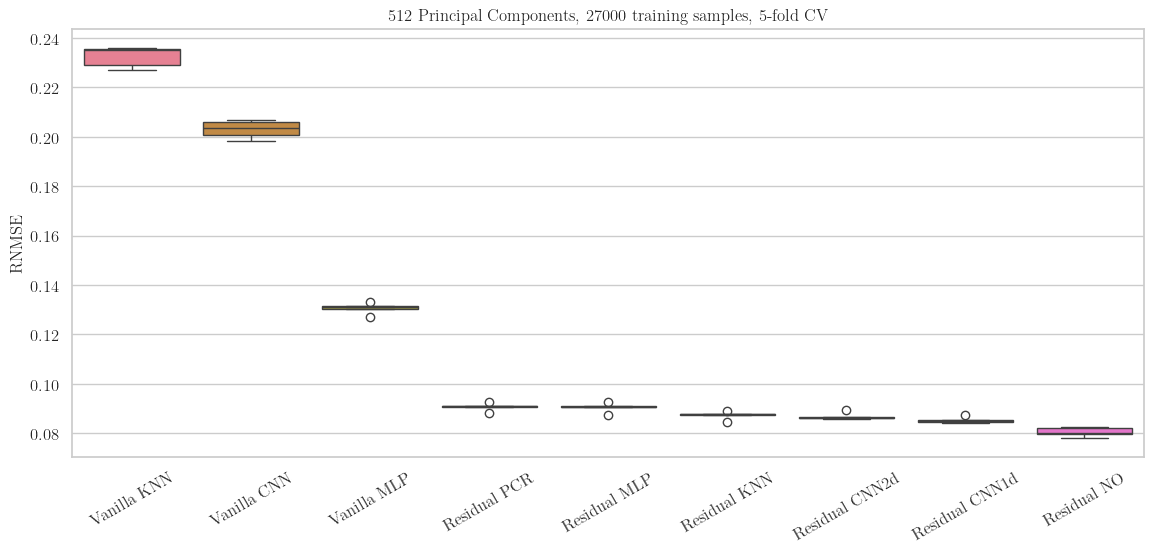

In [90]:
n_components_pca = 512
n_points = 27000
n_cv= 5

data = r
del data["Vanilla LM"]

plt.figure(figsize=(12, 6))
plt.title(f"{n_components_pca} Principal Components, {n_points} training samples, {n_cv}-fold CV")
sns.boxplot(data)
plt.ylabel("RNMSE")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('results.jpg', dpi=150)
plt.show()

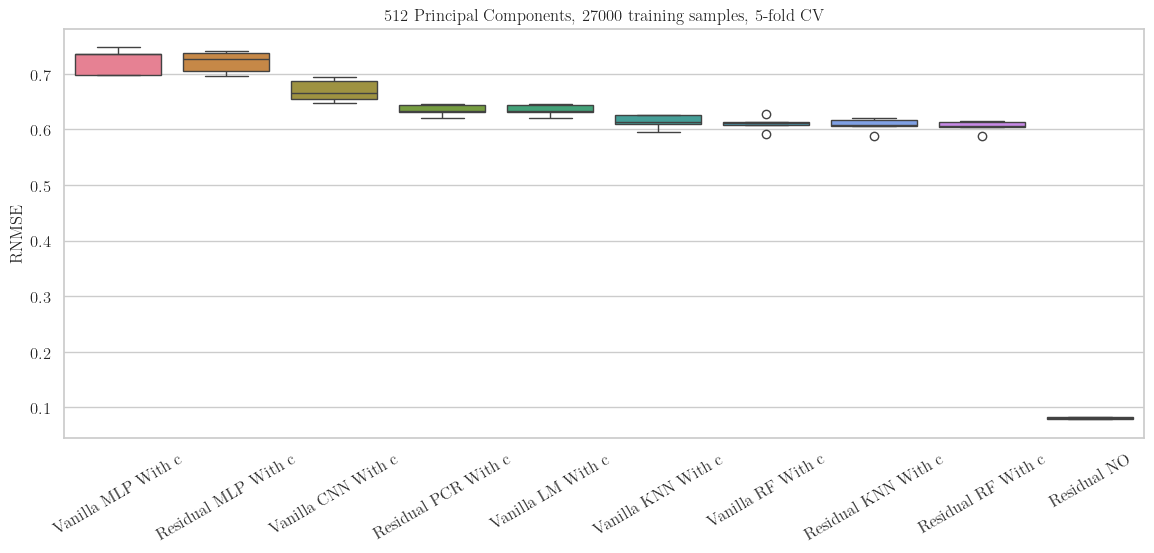

In [91]:
r = pd.concat((r1, r4), axis=1)
r = r.reindex(r.mean().sort_values(ascending=False).index, axis=1)

n_components_pca = 512
n_points = 27000
n_cv= 5

data = r

plt.figure(figsize=(12, 6))
plt.title(f"{n_components_pca} Principal Components, {n_points} training samples, {n_cv}-fold CV")
sns.boxplot(data)
plt.ylabel("RNMSE")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('results_2.jpg', dpi=150)
plt.show()

In [92]:
r = pd.concat((r0, r1, r2, r3, r4), axis=1)
r = r.reindex(r.mean().sort_values(ascending=False).index, axis=1)
r

,Vanilla MLP With c,Residual MLP With c,Vanilla CNN With c,Residual PCR With c,Vanilla LM With c,Vanilla KNN With c,Vanilla RF With c,Residual KNN With c,Residual RF With c,Vanilla KNN,Vanilla CNN,Vanilla MLP,Residual PCR,Vanilla LM,Residual MLP,Residual KNN,Residual CNN2d,Residual CNN1d,Residual NO
0,0.736187,0.737153,0.686556,0.644447,0.644447,0.626437,0.628381,0.616478,0.615038,0.235845,0.200709,0.131055,0.091035,0.091011,0.091185,0.087611,0.086500,0.085340,0.082140
1,0.747617,0.727735,0.654227,0.631860,0.631860,0.613067,0.611977,0.607997,0.605873,0.229154,0.198205,0.130278,0.090773,0.090804,0.090542,0.087263,0.086063,0.084776,0.079732
2,0.736429,0.741522,0.693984,0.645631,0.645631,0.625630,0.614241,0.619878,0.613909,0.235328,0.206192,0.131330,0.091223,0.091222,0.090467,0.087663,0.086369,0.084680,0.082396
3,0.697338,0.705322,0.665596,0.633930,0.633930,0.610191,0.607216,0.606756,0.604326,0.235750,0.203666,0.133190,0.092500,0.092498,0.092726,0.089007,0.085679,0.083972,0.078158
4,0.698742,0.696649,0.647001,0.621279,0.621279,0.594946,0.591357,0.587779,0.588059,0.226921,0.206842,0.127018,0.088002,0.087995,0.087422,0.084397,0.089222,0.087295,0.080168


In [93]:
r.describe().loc[['mean', 'std']]

,Vanilla MLP With c,Residual MLP With c,Vanilla CNN With c,Residual PCR With c,Vanilla LM With c,Vanilla KNN With c,Vanilla RF With c,Residual KNN With c,Residual RF With c,Vanilla KNN,Vanilla CNN,Vanilla MLP,Residual PCR,Vanilla LM,Residual MLP,Residual KNN,Residual CNN2d,Residual CNN1d,Residual NO
mean,0.723263,0.721676,0.669473,0.635429,0.635429,0.614054,0.610634,0.607778,0.605441,0.232599,0.203123,0.130574,0.090707,0.090706,0.090468,0.087188,0.086767,0.085213,0.080519
std,0.023489,0.019773,0.020280,0.010008,0.010008,0.012926,0.013352,0.012481,0.010809,0.004243,0.003659,0.002257,0.001651,0.001653,0.001930,0.001696,0.001408,0.001262,0.001765


In [100]:
from scipy.stats import ttest_ind

In [101]:
pvals = {i:{'p-value': 0} for i in r.columns}
for c in r.columns:
    pvals[c]['p-value'] = float(ttest_ind(r["Residual NO"], r[c], equal_var=False).pvalue)
pvals = pd.DataFrame(pvals)

In [102]:
q = r.reindex(r.mean().sort_values(ascending=False).index, axis=1)
q = pd.concat((q.describe().loc[['mean', 'std']], pvals), axis=0).T

In [103]:
print(q.to_latex(float_format="%.2e"))

\begin{tabular}{lrrr}
\toprule
 & mean & std & p-value \\
\midrule
Vanilla MLP With c & 7.23e-01 & 2.35e-02 & 3.77e-07 \\
Residual MLP With c & 7.22e-01 & 1.98e-02 & 1.80e-07 \\
Vanilla CNN With c & 6.69e-01 & 2.03e-02 & 2.84e-07 \\
Residual PCR With c & 6.35e-01 & 1.00e-02 & 1.07e-08 \\
Vanilla LM With c & 6.35e-01 & 1.00e-02 & 1.07e-08 \\
Vanilla KNN With c & 6.14e-01 & 1.29e-02 & 5.15e-08 \\
Vanilla RF With c & 6.11e-01 & 1.34e-02 & 6.22e-08 \\
Residual KNN With c & 6.08e-01 & 1.25e-02 & 4.52e-08 \\
Residual RF With c & 6.05e-01 & 1.08e-02 & 2.12e-08 \\
Vanilla KNN & 2.33e-01 & 4.24e-03 & 2.97e-09 \\
Vanilla CNN & 2.03e-01 & 3.66e-03 & 1.41e-09 \\
Vanilla MLP & 1.31e-01 & 2.26e-03 & 5.34e-10 \\
Residual PCR & 9.07e-02 & 1.65e-03 & 1.36e-05 \\
Vanilla LM & 9.07e-02 & 1.65e-03 & 1.36e-05 \\
Residual MLP & 9.05e-02 & 1.93e-03 & 2.94e-05 \\
Residual KNN & 8.72e-02 & 1.70e-03 & 2.94e-04 \\
Residual CNN2d & 8.68e-02 & 1.41e-03 & 3.20e-04 \\
Residual CNN1d & 8.52e-02 & 1.26e-03 & 1.71e-03 

In [104]:
q

,mean,std,p-value
Vanilla MLP With c,0.723263,0.023489,3.769112e-07
Residual MLP With c,0.721676,0.019773,1.797141e-07
Vanilla CNN With c,0.669473,0.020280,2.837086e-07
Residual PCR With c,0.635429,0.010008,1.074213e-08
Vanilla LM With c,0.635429,0.010008,1.074130e-08
Vanilla KNN With c,0.614054,0.012926,5.146848e-08
Vanilla RF With c,0.610634,0.013352,6.223804e-08
Residual KNN With c,0.607778,0.012481,4.516840e-08
Residual RF With c,0.605441,0.010809,2.120909e-08
Vanilla KNN,0.232599,0.004243,2.967397e-09
